# Import libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# import Data 


In [74]:
train_dir = 'C:/Users/ak320/Downloads/archive (10)/train/'
test_dir = 'C:/Users/ak320/Downloads/archive (10)/test/'
def count_expression(path, set_):
    dict_ = {}
    for face_expression in os.listdir(path):
        dir_ = path + face_expression
        dict_[face_expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_expression(train_dir, 'train')
test_count = count_expression(test_dir, 'test')
print(train_count)
print(test_count)


       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


# Visualizing Images

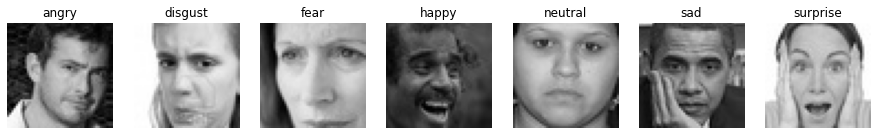

In [24]:
plt.figure(figsize=(20,20))
i = 1
for face_expression in os.listdir(train_dir):
    img = load_img((
        train_dir + face_expression +'/'+ os.listdir(train_dir + face_expression)[1]))
    plt.subplot(1,9,i)
    plt.imshow(img)
    plt.title(face_expression)
    plt.axis('off')
    i += 1
plt.show()


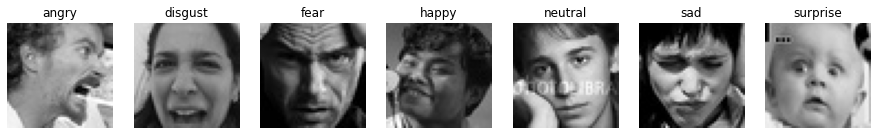

In [25]:
plt.figure(figsize=(20,20))
i = 1
for face_expression in os.listdir(test_dir):
    img = load_img((test_dir + face_expression +'/'+ os.listdir(test_dir + face_expression)[1]))
    plt.subplot(1,9,i)
    plt.imshow(img)
    plt.title(face_expression)
    plt.axis('off')
    i += 1
plt.show()

# Visualizing Training Images

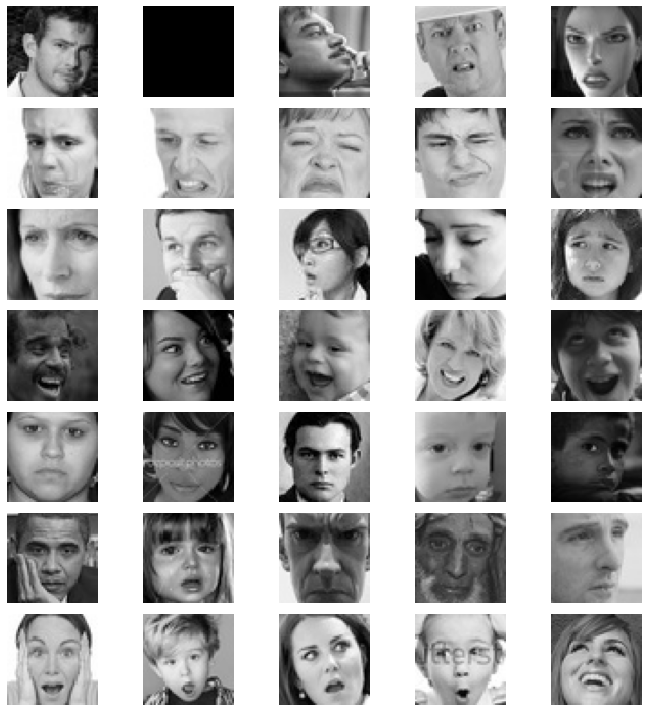

In [26]:
img_size = 50
plt.figure(0, figsize=(10,10))
index = 0
for link in os.listdir("C:/Users/ak320/Downloads/archive (10)/train/"):
    for i in range(1,6):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("C:/Users/ak320/Downloads/archive (10)/train/" + link + "/" +os.listdir("C:/Users/ak320/Downloads/archive (10)/train/" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img)
        plt.axis('off')
plt.tight_layout()

<AxesSubplot:>

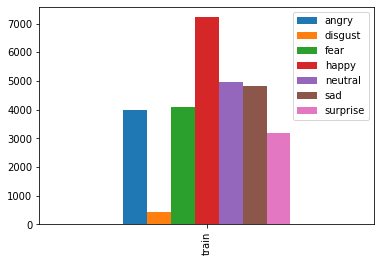

In [27]:
train_count.plot(kind='bar')

# Visualizing Test Images

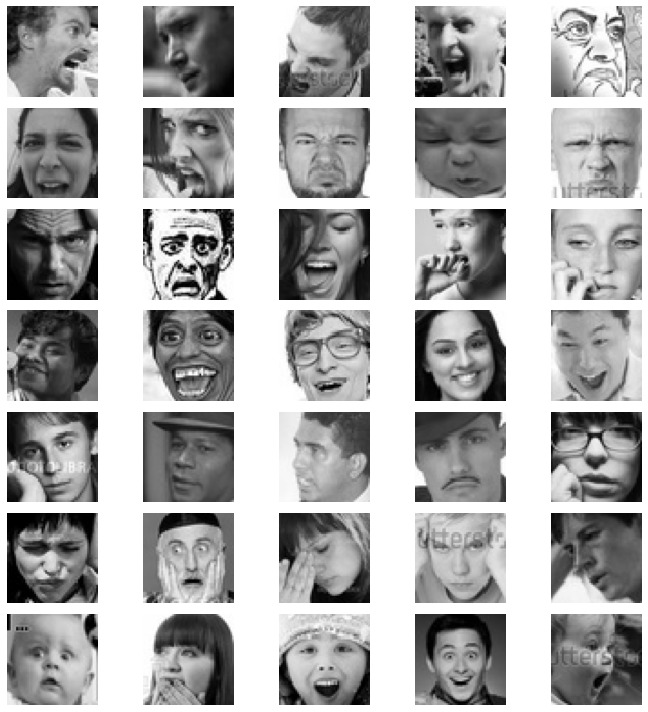

In [28]:
img_size = 50
plt.figure(0, figsize=(10,10))
index = 0
for link in os.listdir("C:/Users/ak320/Downloads/archive (10)/test/"):
    for i in range(1,6):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("C:/Users/ak320/Downloads/archive (10)/test/" + link + "/" +os.listdir("C:/Users/ak320/Downloads/archive (10)/test/" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img)   
        plt.axis('off')
plt.tight_layout()

<AxesSubplot:>

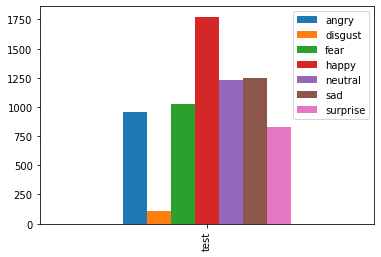

In [29]:
test_count.plot(kind='bar')

# Data Preprocessing and Model Building



In [30]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir, batch_size=64, target_size=(48,48), shuffle=True, color_mode='grayscale', class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
test_set = test_datagen.flow_from_directory(test_dir, batch_size=64, target_size=(48,48), shuffle=True, color_mode='grayscale', class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [31]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [32]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [33]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [34]:
history = model.fit(x = training_set, epochs = 1, validation_data = test_set, batch_size=64)

449/449 [==============================] - 648s 1s/step - loss: 1.9450 - accuracy: 0.2913 - val_loss: 2.2125 - val_accuracy: 0.2742


In [35]:
train_loss, train_acc = model.evaluate(training_set)
test_loss, test_acc = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

113/113 [==============================] - 11s 95ms/step - loss: 2.2125 - accuracy: 0.2742
final train accuracy = 26.38 , validation accuracy = 27.42


# Emotion Recognition on Custom Image

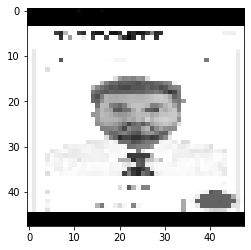

(48, 48, 1)


In [77]:
# Load and resize the image using Keras
img = image.load_img('C:/Users/ak320/OneDrive/Documents/dileep.jpg', target_size=(48, 48), color_mode="grayscale")
img = image.img_to_array(img)

# Display the image
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Print the shape of the image
print(img.shape)


In [78]:
label_dict = {0:'Angry', 1:'Disgust', 2:'happy', 3:'fear', 4:'Neutral', 5:'Sad', 6:'Surprise'}
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array.reshape(1, 48, 48, 1)
result = model.predict(image_array)
result = list(result[0])
print(result)


1/1 [==============================] - 0s 32ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [79]:
img_index = result.index(max(result))
emotion = label_dict[img_index]
emotion

'happy'

In [53]:
from IPython.display import Audio

rate = 45100  # Example sampling rate (adjust accordingly)
audio_file = "C:/Users/ak320/Music/surprise.mp3"  # Replace with the path to your audio file

print(f'Playing {emotion} song')
Audio(filename=audio_file, rate=rate, autoplay=True)


Playing Fear song
